In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import plotly.express as p 
import re
import numpy as np
import enchant
dict = enchant.Dict("en_US")

### SCRAPED INSTAGRAM DATA 

In [2]:
df1=pd.read_csv('post_details.csv',converters={'caption hashtags':literal_eval})
df1["date"]=pd.to_datetime(df1["date"])
df1

,mediaid,username,caption,date,typename,no of post,caption hashtags,caption mentions,tagged users,likes,comments,post url,shortcode
0,3.149730e+18,indiatoday,Prime Minister @narendramodi on Tuesday said t...,2023-07-18 16:11:00,GraphImage,1,"[pmmodi, nda, delhi, bjp, politics]",['narendramodi'],[],363,12,https://instagram.fixm4-1.fna.fbcdn.net/v/t51....,Cu2E3tWphNH
1,3.149720e+18,indiatoday,Ranveer Singh and Alia Bhatt witness a sea of ...,2023-07-18 15:55:00,GraphVideo,1,"[aliabhatt, ranveersingh, vadodara, filmpromot...","['aliaabhatt', 'ranveersingh']",[],526,7,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....,Cu2Cj11Lb0o
2,3.149710e+18,indiatoday,A poor dhabba chai seller from Pakistan capita...,2023-07-18 15:40:00,GraphImage,1,"[arshadkhan, chaiwala, cafe, pakistan, london]",[],[],2302,18,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....,Cu2BZSXJXmZ
3,3.149700e+18,indiatoday,Delhi Lieutenant Governor VK Saxena visited th...,2023-07-18 15:26:00,GraphVideo,1,"[floods, delhi, lg, vksaxena, rajghat]",[],[],423,6,https://instagram.fixm4-1.fna.fbcdn.net/v/t51....,Cu1_vV3pt8C
4,3.149690e+18,indiatoday,A controversy started after the results of the...,2023-07-18 15:06:00,GraphImage,1,"[madhyapradesh, exam, scam]",[],[],3678,30,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....,Cu19cmhNUck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,3.148320e+18,hindustantimes,A #seaturtle in Alabama got a #CTscan done on ...,2023-07-16 17:30:00,GraphImage,1,"[seaturtle, ctscan, turtle, animal, instawithh...",[],[],25366,59,https://instagram.fixm4-2.fna.fbcdn.net/v/t39....,CuxEUOyhsEq
506,3.148270e+18,hindustantimes,"#PriyankaChopra and #NickJonas, recently grace...",2023-07-16 15:56:00,GraphSidecar,6,"[priyankachopra, nickjonas, wimbledontennischa...",[],[],44940,111,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....,Cuw5nOqPymt
507,3.148260e+18,hindustantimes,Revenue Secretary Sanjay Malhotra has asked #i...,2023-07-16 15:30:00,GraphImage,1,"[incometax, financeministry, itr, instawithht,...",[],[],5404,25,https://instagram.fixm4-3.fna.fbcdn.net/v/t39....,Cuw2lJUPeJq
508,3.148230e+18,hindustantimes,A video of former #Congress president #SoniaGa...,2023-07-16 14:35:00,GraphVideo,1,"[congress, soniagandhi, farmers, haryana, vira...",[],[],15049,332,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....,CuwwVuMPQ68


### ACTIVE USERS IN INSTAGRAM

In [3]:
count={}
l=0
q=[]
for i in range(len(df1)):
    if df1["username"][i] not in q:
        if df1["username"][i] not in count:
            count[df1["username"][i]]=[df1["date"][i]-df1["date"][i]]
        else:
            count[df1["username"][i]]+=[df1["date"][i-1]-df1["date"][i]]
        l+=1
        if l==df1.groupby(["username"]).count().min()[0]:
            l=0
            q.append(df1["username"][i])
            
u,d=[],[]
for i,j in zip(count.keys(),count.values()):
    s=timedelta(days=0)
    for k in j:
        s+=k
    u.append(i)
    d.append(s)
    
df=pd.DataFrame({"username":u,"time":d})
df["time"]=df["time"].dt.days
df["time"]=abs(df["time"])
df=df.sort_values(by="time")
df

,username,time
0,indiatoday,0
3,skynews,1
6,timesnow,1
9,hindustantimes,2
2,wionews,3
5,ndtv,20
8,dailymail,81
1,cnn,82
7,euronews.tv,102
4,bbcnews,143


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'username')

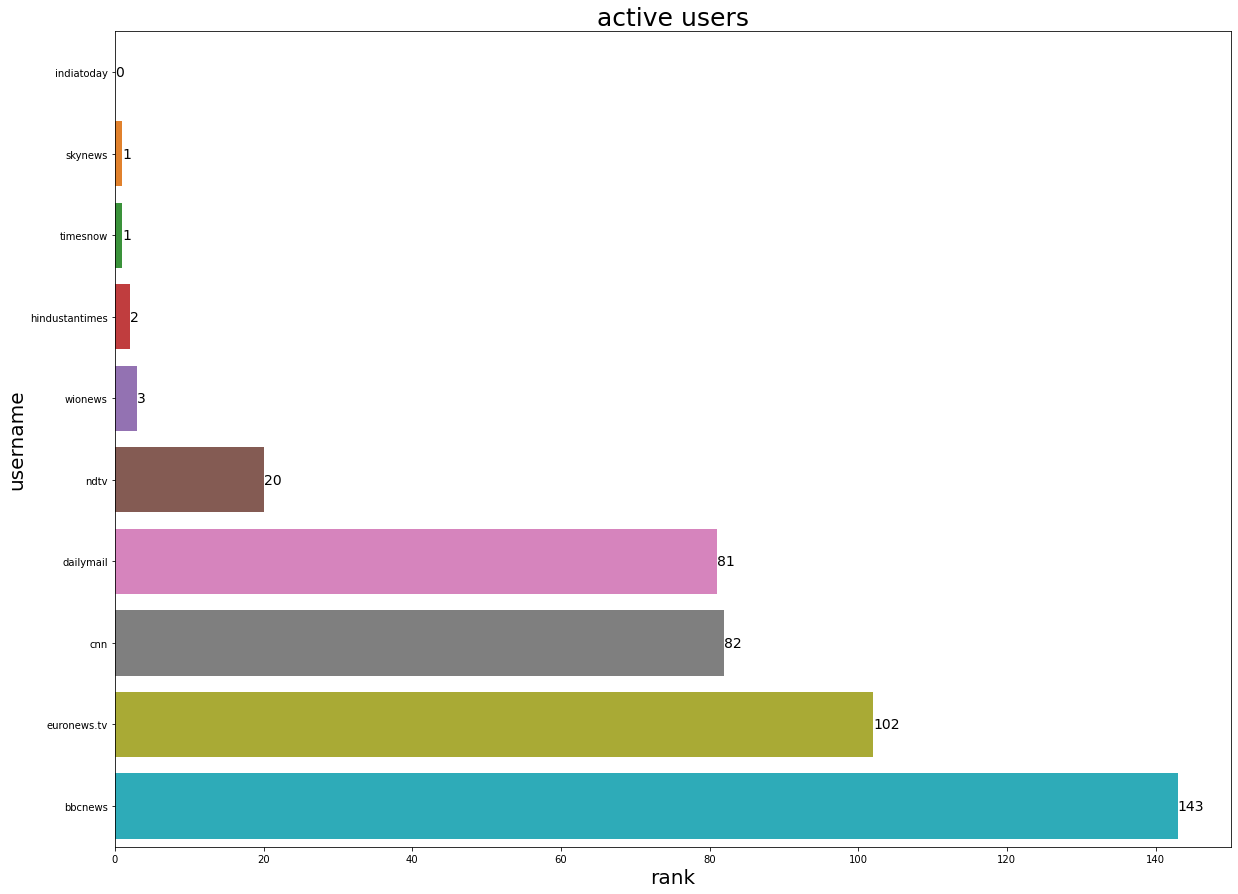

In [4]:
fig,ax=plt.subplots(figsize=(20, 15))
sns.barplot(df["time"],df["username"],orient="h")
ax.bar_label(ax.containers[0],color="black",fontsize=14)
ax.set_title("active users",fontsize = 25)
ax.set_xlabel("rank", fontsize=20)
ax.set_ylabel("username",fontsize=20) 

### MOSTLY LIKED INSTAGRAM HASHTAGS COMPARING WITH THE CHANNELS

In [5]:
u=[]
h=[]
l=[]
for i in range(len(df1)):
    for j in df1["caption hashtags"][i]:
        u.append(df1["username"][i])
        h.append(j)
        l.append(df1["likes"][i])
df=pd.DataFrame({"u":u,"h":h,"l":l})
df.to_csv("likes.csv")
df

,u,h,l
0,indiatoday,pmmodi,363
1,indiatoday,nda,363
2,indiatoday,delhi,363
3,indiatoday,bjp,363
4,indiatoday,politics,363
...,...,...,...
1710,hindustantimes,indianews,24693
1711,hindustantimes,nepal,24693
1712,hindustantimes,instawithht,24693
1713,hindustantimes,hindustantimes,24693


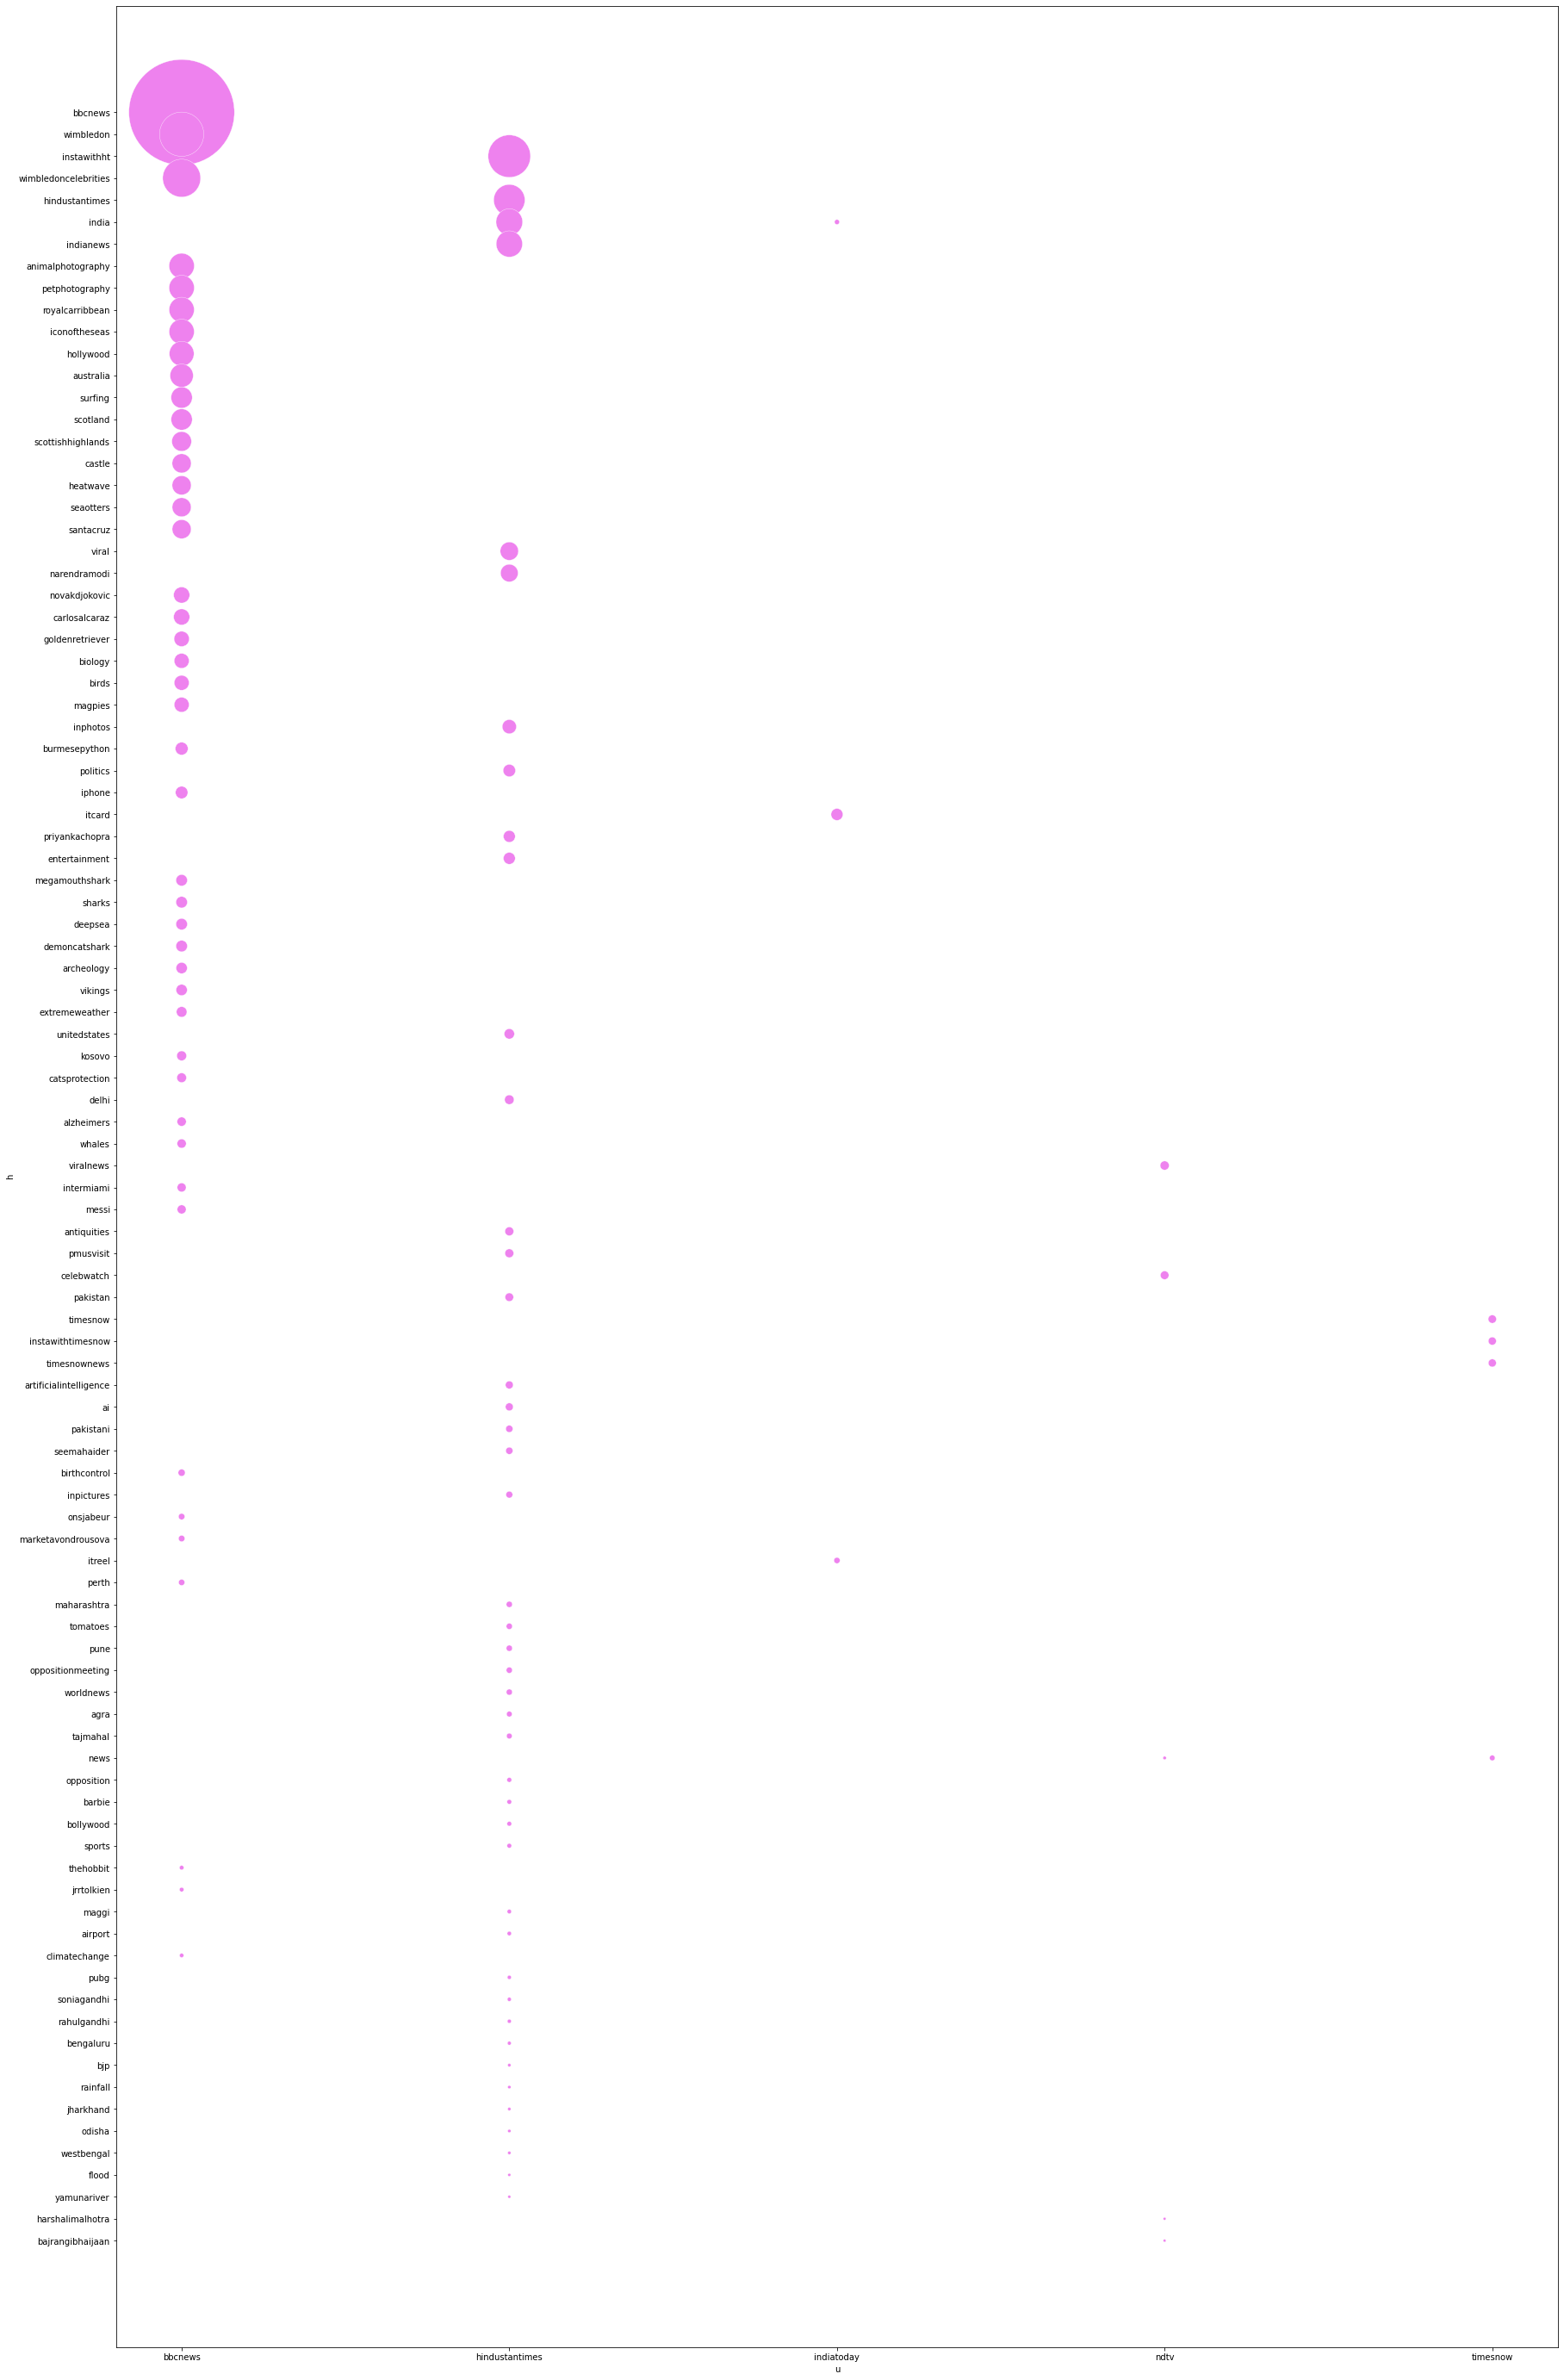

In [6]:
df1=df.groupby(["h","u"]).sum().sort_values(by="l",ascending=False)[:100]
df1.to_csv("likes.csv")
plt.figure(figsize=(30,50))
sns.scatterplot(data=df1,x="u", y="h", size="l", legend=False, sizes=(10, 15000),color="violet")
plt.show()

### SCRAPED YOUTUBE DATA

In [7]:
df2=pd.read_csv(r"video_details.csv")
df2

,Unnamed: 0,VIDEO_ID,CHANNEL_TITLE,VIDEO_DURATION,HEADLINE,UPLOAD_DATE,VIEWS,LIKES,COMMENTS,VIDEO_DESCRIPTION
0,0,KubsowPH9e0,India Today,"(94, 'seconds')",Why Barbie And Blackpink Are In Trouble Over A...,2023-07-17T18:30:14Z,879,4,0,"The upcoming ""Barbie"" movie and a Blackpink co..."
1,1,YOkzkdiXZjc,India Today,"(1522, 'seconds')",India First With Gaurav Sawant: Seema-Sachin L...,2023-07-17T18:00:08Z,4414,29,5,Pakistan’s intelligence agencies have informed...
2,2,H7aoydmGINk,India Today,"(243, 'seconds')",More Optimistic About India Now Than &#39;In A...,2023-07-17T17:56:38Z,1142,8,1,World Bank President Ajay Banga on Monday said...
3,3,gT0-UHiYQWU,India Today,"(276, 'seconds')",What Were The Red Flags &amp; Were Red Flags E...,2023-07-17T17:49:01Z,680,3,0,Pakistan’s intelligence agencies have informed...
4,4,gANIoLugNaA,India Today,"(389, 'seconds')","Seema Haider, Her Lover Sachin And His Father ...",2023-07-17T17:39:58Z,3928,11,2,Pakistan’s intelligence agencies have informed...
...,...,...,...,...,...,...,...,...,...,...
495,495,dc-Y2d1-puw,Hindustan Times,"(175, 'seconds')",&#39;Revolt&#39; in Ukraine&#39;s Army as Bakh...,2023-04-23T03:09:53Z,338447,4965,2024,An alleged revolt has rocked Ukraine's army am...
496,496,y7kfQsG6ToY,Hindustan Times,"(206, 'seconds')",Russia retaliates to Germany&#39;s &#39;dirty&...,2023-04-23T01:30:31Z,314085,3017,2142,Diplomatic tensions between Russia and Germany...
497,497,5qe4AxYjvU0,Hindustan Times,"(210, 'seconds')","India, Bangladesh ditch Dollar; Rupee-Taka tra...",2023-04-22T15:08:13Z,191760,1807,816,India and Bangladesh have joined hands amid a ...
498,498,EiRimQAOqmc,Hindustan Times,"(199, 'seconds')",West&#39;s &#39;Leopards&#39; bite Ukraine! Do...,2023-04-22T13:10:00Z,342844,3373,1733,The arrival of much-awaited Leopard tanks in U...


In [8]:
df3=pd.read_csv(r'channel_details.csv')
df3

,Unnamed: 0,CHANNEL_ID,CHANNEL_TITLE,CHANNEL_DESCRIPTION,CHANNEL_SUBSCRIBERS,CHANNEL_VIDEOS,CHANNEL_VIEW_COUNT,CHANNEL_CREATION_DATE
0,0,UCYPvAwZP8pZhSMW8qs7cVCw,India Today,India Today TV is India's leading English News...,7360000,148618,2552121484,2015-05-23T16:07:12Z
1,1,UCupvZG-5ko_eiXAupbDfxWw,CNN,CNN operates as a division of Turner Broadcast...,15300000,160306,14229952089,2005-10-02T16:06:36Z
2,2,UC_gUM8rL-Lrg6O3adPW9K1g,WION,"WION -The World is One News, examines global i...",7620000,107579,4023137050,2016-05-19T12:55:08Z
3,3,UCoMdktPbSTixAyNGwb-UYkQ,Sky News,The best of Sky News video from the UK and aro...,6530000,36187,3963389140,2006-06-12T12:03:23Z
4,4,UC16niRr50-MSBwiO3YDb3RA,BBC News,Welcome to the official BBC News YouTube chann...,14500000,18935,4607806743,2006-04-08T05:51:05Z
5,5,UCZFMm1mMw0F81Z37aaEzTUA,NDTV,NDTV is one of the leaders in the production a...,12500000,150800,4948335489,2006-05-08T04:31:19Z
6,6,UC6RJ7-PaXg6TIH2BzZfTV7w,TIMES NOW,Times Now - Times Now News channel examines ne...,3150000,83145,1426897927,2008-04-25T04:42:18Z
7,7,UCSrZ3UV4jOidv8ppoVuvW9Q,euronews,Welcome to the official Euronews YouTube chann...,2270000,95672,1322659944,2006-09-19T02:45:15Z
8,8,UCw3fku0sH3qA3c3pZeJwdAw,Daily Mail,Daily Mail (MailOnline) is one of the world's ...,2560000,52964,1908012136,2012-08-20T10:16:40Z
9,9,UCm7lHFkt2yB_WzL67aruVBQ,Hindustan Times,"Hindustan Times Videos bring you news, views a...",5690000,49450,3999277119,2005-11-16T02:41:16Z


### DATA CLEANING

In [9]:
df2.isna().sum()

Unnamed: 0           0
VIDEO_ID             0
CHANNEL_TITLE        0
VIDEO_DURATION       0
HEADLINE             0
UPLOAD_DATE          0
VIEWS                0
LIKES                0
COMMENTS             0
VIDEO_DESCRIPTION    3
dtype: int64

In [10]:
df2.dropna(inplace=True)

### EXTRACTING THE HASHTAGS

In [11]:
vid=[]
for i in df2.index:
    vid.append(re.findall('#\w+',df2['VIDEO_DESCRIPTION'][i]))
df2['Video_Tags']=vid
df2

,Unnamed: 0,VIDEO_ID,CHANNEL_TITLE,VIDEO_DURATION,HEADLINE,UPLOAD_DATE,VIEWS,LIKES,COMMENTS,VIDEO_DESCRIPTION,Video_Tags
0,0,KubsowPH9e0,India Today,"(94, 'seconds')",Why Barbie And Blackpink Are In Trouble Over A...,2023-07-17T18:30:14Z,879,4,0,"The upcoming ""Barbie"" movie and a Blackpink co...","[#NewsMo, #China, #Vietnam, #SouthChinaSea, #b..."
1,1,YOkzkdiXZjc,India Today,"(1522, 'seconds')",India First With Gaurav Sawant: Seema-Sachin L...,2023-07-17T18:00:08Z,4414,29,5,Pakistan’s intelligence agencies have informed...,"[#seemahaider, #pakistan, #seemahaidernews, #i..."
2,2,H7aoydmGINk,India Today,"(243, 'seconds')",More Optimistic About India Now Than &#39;In A...,2023-07-17T17:56:38Z,1142,8,1,World Bank President Ajay Banga on Monday said...,"[#worldbankpresident, #ajaybanga, #g20summit, ..."
3,3,gT0-UHiYQWU,India Today,"(276, 'seconds')",What Were The Red Flags &amp; Were Red Flags E...,2023-07-17T17:49:01Z,680,3,0,Pakistan’s intelligence agencies have informed...,"[#seemahaider, #pakistan, #seemahaidernews, #i..."
4,4,gANIoLugNaA,India Today,"(389, 'seconds')","Seema Haider, Her Lover Sachin And His Father ...",2023-07-17T17:39:58Z,3928,11,2,Pakistan’s intelligence agencies have informed...,"[#seemahaider, #pakistan, #seemahaidernews, #i..."
...,...,...,...,...,...,...,...,...,...,...,...
495,495,dc-Y2d1-puw,Hindustan Times,"(175, 'seconds')",&#39;Revolt&#39; in Ukraine&#39;s Army as Bakh...,2023-04-23T03:09:53Z,338447,4965,2024,An alleged revolt has rocked Ukraine's army am...,"[#bakhmut, #revolt, #ukrainiantroops, #russiau..."
496,496,y7kfQsG6ToY,Hindustan Times,"(206, 'seconds')",Russia retaliates to Germany&#39;s &#39;dirty&...,2023-04-23T01:30:31Z,314085,3017,2142,Diplomatic tensions between Russia and Germany...,"[#germany, #russia, #diplomats, #russiagermany..."
497,497,5qe4AxYjvU0,Hindustan Times,"(210, 'seconds')","India, Bangladesh ditch Dollar; Rupee-Taka tra...",2023-04-22T15:08:13Z,191760,1807,816,India and Bangladesh have joined hands amid a ...,"[#india, #bangladesh, #dollar, #rupee, #taka, ..."
498,498,EiRimQAOqmc,Hindustan Times,"(199, 'seconds')",West&#39;s &#39;Leopards&#39; bite Ukraine! Do...,2023-04-22T13:10:00Z,342844,3373,1733,The arrival of much-awaited Leopard tanks in U...,"[#ukraine, #leopard, #battletanks, #russiaukra..."


### PREPROCESSING THE TAGS

In [12]:
for i in df2.index:
    for j in range(len(df2['Video_Tags'][i])):
        df2['Video_Tags'][i][j]=re.sub('#','',df2['Video_Tags'][i][j])
        df2['Video_Tags'][i][j]=df2['Video_Tags'][i][j].lower()
df2

,Unnamed: 0,VIDEO_ID,CHANNEL_TITLE,VIDEO_DURATION,HEADLINE,UPLOAD_DATE,VIEWS,LIKES,COMMENTS,VIDEO_DESCRIPTION,Video_Tags
0,0,KubsowPH9e0,India Today,"(94, 'seconds')",Why Barbie And Blackpink Are In Trouble Over A...,2023-07-17T18:30:14Z,879,4,0,"The upcoming ""Barbie"" movie and a Blackpink co...","[newsmo, china, vietnam, southchinasea, blackp..."
1,1,YOkzkdiXZjc,India Today,"(1522, 'seconds')",India First With Gaurav Sawant: Seema-Sachin L...,2023-07-17T18:00:08Z,4414,29,5,Pakistan’s intelligence agencies have informed...,"[seemahaider, pakistan, seemahaidernews, india..."
2,2,H7aoydmGINk,India Today,"(243, 'seconds')",More Optimistic About India Now Than &#39;In A...,2023-07-17T17:56:38Z,1142,8,1,World Bank President Ajay Banga on Monday said...,"[worldbankpresident, ajaybanga, g20summit, bus..."
3,3,gT0-UHiYQWU,India Today,"(276, 'seconds')",What Were The Red Flags &amp; Were Red Flags E...,2023-07-17T17:49:01Z,680,3,0,Pakistan’s intelligence agencies have informed...,"[seemahaider, pakistan, seemahaidernews, india..."
4,4,gANIoLugNaA,India Today,"(389, 'seconds')","Seema Haider, Her Lover Sachin And His Father ...",2023-07-17T17:39:58Z,3928,11,2,Pakistan’s intelligence agencies have informed...,"[seemahaider, pakistan, seemahaidernews, india..."
...,...,...,...,...,...,...,...,...,...,...,...
495,495,dc-Y2d1-puw,Hindustan Times,"(175, 'seconds')",&#39;Revolt&#39; in Ukraine&#39;s Army as Bakh...,2023-04-23T03:09:53Z,338447,4965,2024,An alleged revolt has rocked Ukraine's army am...,"[bakhmut, revolt, ukrainiantroops, russiaukrai..."
496,496,y7kfQsG6ToY,Hindustan Times,"(206, 'seconds')",Russia retaliates to Germany&#39;s &#39;dirty&...,2023-04-23T01:30:31Z,314085,3017,2142,Diplomatic tensions between Russia and Germany...,"[germany, russia, diplomats, russiagermany, be..."
497,497,5qe4AxYjvU0,Hindustan Times,"(210, 'seconds')","India, Bangladesh ditch Dollar; Rupee-Taka tra...",2023-04-22T15:08:13Z,191760,1807,816,India and Bangladesh have joined hands amid a ...,"[india, bangladesh, dollar, rupee, taka, india..."
498,498,EiRimQAOqmc,Hindustan Times,"(199, 'seconds')",West&#39;s &#39;Leopards&#39; bite Ukraine! Do...,2023-04-22T13:10:00Z,342844,3373,1733,The arrival of much-awaited Leopard tanks in U...,"[ukraine, leopard, battletanks, russiaukrainew..."


### APPENDING HASHTAGS FROM LIST

In [13]:
df1=pd.read_csv('post_details.csv',converters={'caption hashtags':literal_eval})
df1["date"]=pd.to_datetime(df1["date"])

In [14]:
utube,insta=[],[]
for i in df2.index:
    for j in df2['Video_Tags'][i]:
        utube.append(j)
for i in range(len(df1)):
    for j in df1['caption hashtags'][i]:
        insta.append(j)

### COMMON HASHTAGS FROM INSTAGRAM AND YOUTUBE

In [15]:
uni_utube=set(utube)
uni_inst=set(insta)
common=[]
for i in uni_utube:
    if (i in uni_utube) and (i in uni_inst):
        common.append(i)
for j in uni_inst:
    if (j in uni_inst) and (j in uni_utube):
        common.append(j)

### COUNT OF HASHTAGS IN INSTAGRAM (TOP 10)

In [16]:
insta_likes={}
for i in common:
    count=0
    for j in range(len(df1)):
        for k in df1['caption hashtags'][j]:
            if i==k:
                count+=df1['likes'][j]
    insta_likes[i]=count
sort_insta=sorted(insta_likes.items(),key=lambda x:x[1],reverse=True)
sort_insta[0:10]

[('bbcnews', 4312803),
 ('india', 416355),
 ('indianews', 307236),
 ('narendramodi', 183809),
 ('viral', 171759),
 ('politics', 150204),
 ('artificialintelligence', 109569),
 ('news', 106982),
 ('delhi', 105665),
 ('unitedstates', 97917)]

In [68]:
tags=[]
count,count1=[],[]
for i in sort_insta[0:10]:
    tags.append(i[0])
    count1.append(insta_likes[i[0]])
    count.append(i[1])

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TOP 10 HASHTAGS OF YOUTUBE')

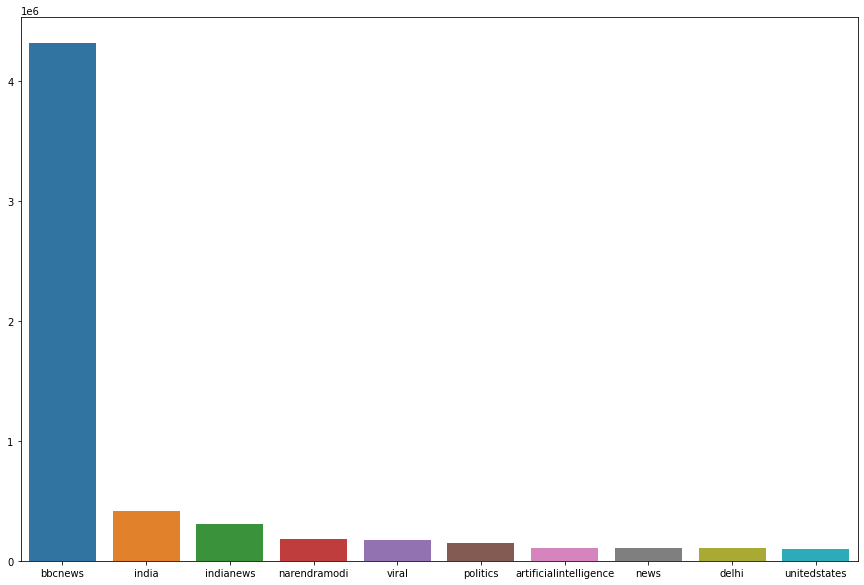

In [74]:
plt.figure(figsize=(15,10))
sns.barplot(tags,count1)
ax.set_title("TOP 10 HASHTAGS OF YOUTUBE")

In [17]:
unique_channel=df2.groupby(df2['CHANNEL_TITLE']).sum()
unique_channel

,Unnamed: 0,VIEWS,LIKES,COMMENTS
CHANNEL_TITLE,,,,
BBC News,11225,13080513,162181,55492
CNN,3544,13025014,195529,66644
Daily Mail,21225,10736867,68708,25766
Hindustan Times,23725,14121941,163423,79969
India Today,1225,355901,2194,974
NDTV,13725,2737787,21999,7282
Sky News,8538,2885761,34991,12210
TIMES NOW,16225,3018415,16551,8560
WION,6225,11884697,103481,38479


In [18]:
unique_channel['ENGAGEMENT_RATE']=np.NaN
for i in range(len(unique_channel)):
    unique_channel['ENGAGEMENT_RATE'][i]=((df2['LIKES'][i]+df2['COMMENTS'][i])/(df2['VIEWS'][i]))*100
unique_channel

C:\Users\aashi\AppData\Local\Temp/ipykernel_14552/1418713085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_channel['ENGAGEMENT_RATE'][i]=((df2['LIKES'][i]+df2['COMMENTS'][i])/(df2['VIEWS'][i]))*100


,Unnamed: 0,VIEWS,LIKES,COMMENTS,ENGAGEMENT_RATE
CHANNEL_TITLE,,,,,
BBC News,11225,13080513,162181,55492,0.455063
CNN,3544,13025014,195529,66644,0.770276
Daily Mail,21225,10736867,68708,25766,0.788091
Hindustan Times,23725,14121941,163423,79969,0.441176
India Today,1225,355901,2194,974,0.330957
NDTV,13725,2737787,21999,7282,0.133690
Sky News,8538,2885761,34991,12210,0.648298
TIMES NOW,16225,3018415,16551,8560,1.008427
WION,6225,11884697,103481,38479,1.253940


# COUNT OF HASHTAGS IN YOUTUBE (TOP 10)

In [21]:
utube_likes={}
for i in common:
    count=0
    for j in df2.index:
        for k in df2['Video_Tags'][j]:
            if i==k:
                count+=df2['LIKES'][j]
    utube_likes[i]=count
sort_utube=sorted(utube_likes.items(),key=lambda x:x[1],reverse=True)
sort_utube[0:10]

[('bbcnews', 162181),
 ('news', 157451),
 ('russia', 126149),
 ('india', 124438),
 ('ukraine', 110798),
 ('ukrainewar', 89038),
 ('royals', 48553),
 ('putin', 47315),
 ('hindu', 46932),
 ('uknews', 39680)]

In [66]:
tags=[]
count,count1=[],[]
for i in sort_utube[0:10]:
    tags.append(i[0])
    count1.append(utube_likes[i[0]])
    count.append(i[1])

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TOP 10 HASHTAGS OF YOUTUBE')

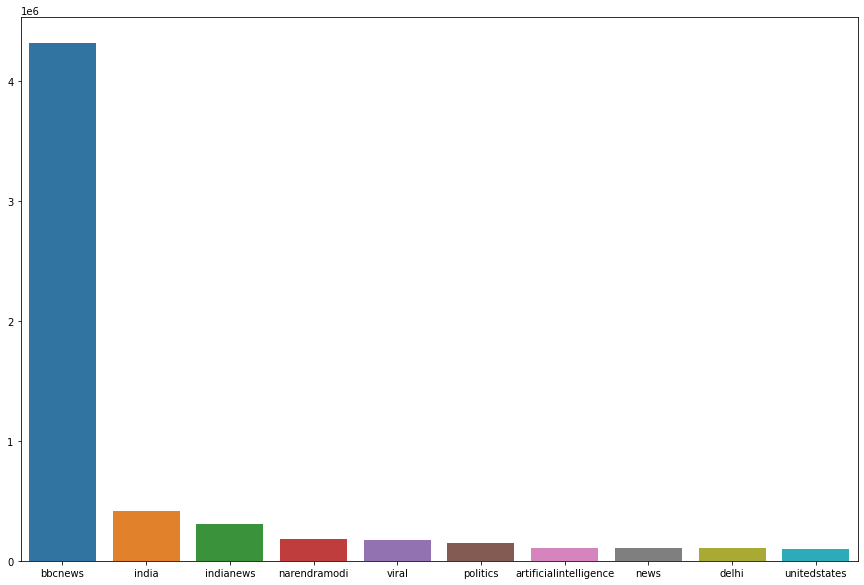

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(tags,count1)
ax.set_title("TOP 10 HASHTAGS OF YOUTUBE")

# VISULAISING THE YOUTUBE & INSTAGRAM LIKES BY HASHTAGS

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


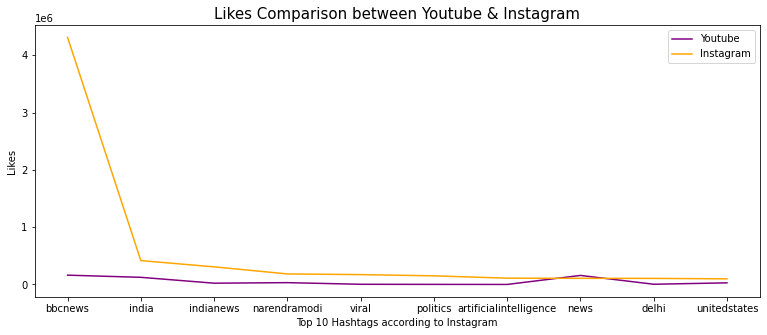

In [65]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(13, 5))
sns.lineplot(tags,count1,color="purple")
sns.lineplot(tags,count,color="orange")
ax.set_title("Likes Comparison between Youtube & Instagram",fontsize = 15)
ax.set_xlabel("Top 10 Hashtags according to Instagram", fontsize=10)
ax.set_ylabel("Likes",fontsize=10)
plt.legend(labels=["Youtube","Instagram"])


### VISUALISING THE LIKES OF YOUTUBE & INSTAGRAM BY HASHTAGS

In [24]:
tags=[]
count,count1=[],[]
for i in sort_utube[0:10]:
    tags.append(i[0])
    count1.append(insta_likes[i[0]])
    count.append(i[1])

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


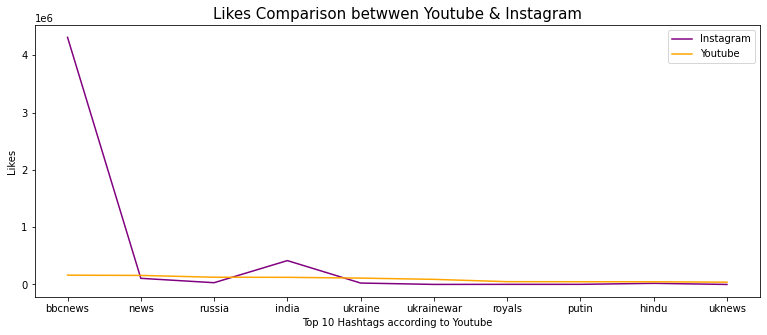

In [25]:
fig,ax=plt.subplots(figsize=(13, 5))
sns.lineplot(tags,count1,color="purple")
sns.lineplot(tags,count,color="orange")
ax.set_title("Likes Comparison betwwen Youtube & Instagram",fontsize = 15)
ax.set_xlabel("Top 10 Hashtags according to Youtube", fontsize=10)
ax.set_ylabel("Likes",fontsize=10)
plt.legend(labels=["Instagram","Youtube"])


### INSTAGRAM SENTIMENT ANALYSIS

In [26]:
b=df1[['username','caption','date']].dropna()
engcom=[]
for j in b['caption']:
    sample_list=[]
    for i in j:
        if i.isalpha():
            sample_list.append(i)
        if i==' ':
            sample_list.append(' ')
        
    normal_string="".join(sample_list)
    engcom.append(normal_string)
engcom
b

,username,caption,date
0,indiatoday,Prime Minister @narendramodi on Tuesday said t...,2023-07-18 16:11:00
1,indiatoday,Ranveer Singh and Alia Bhatt witness a sea of ...,2023-07-18 15:55:00
2,indiatoday,A poor dhabba chai seller from Pakistan capita...,2023-07-18 15:40:00
3,indiatoday,Delhi Lieutenant Governor VK Saxena visited th...,2023-07-18 15:26:00
4,indiatoday,A controversy started after the results of the...,2023-07-18 15:06:00
...,...,...,...
505,hindustantimes,A #seaturtle in Alabama got a #CTscan done on ...,2023-07-16 17:30:00
506,hindustantimes,"#PriyankaChopra and #NickJonas, recently grace...",2023-07-16 15:56:00
507,hindustantimes,Revenue Secretary Sanjay Malhotra has asked #i...,2023-07-16 15:30:00
508,hindustantimes,A video of former #Congress president #SoniaGa...,2023-07-16 14:35:00


In [27]:
Category=[]
for i in engcom:
    text=i.split(" ") or i.split("")
    while("" in text):
        text.remove("")
    Category.append(text)
good=[]
for i in range(len(Category)):
    x=[]
    for j in Category[i]:
        if dict.check(j)==True:
            x.append(j)
    if len(x)!=0:
        good.append(x)
newcomment=[]
for i in range(len(good)):
    comment=' '.join([str(word) for word in good[i]])
    newcomment.append(comment)

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print(sentiment_dict['neg']*100, "% Negative")
    #print(sentiment_dict['neu']*100, "% Neutral")
    #print(sentiment_dict['pos']*100, "% Positive")
    #print("Sentence Overall Rated As", end = " ")
    
    positive.append(sentiment_dict['pos']*100)
    neutral.append(sentiment_dict['neu']*100)
    negative.append(sentiment_dict['neg']*100)
    
    if sentiment_dict['compound'] >= 0 :
        #print("Positive")
        review.append("Positive")
        overall.append("Positive")
    else:
        review.append("Negative")
        overall.append("Negative")

    #print('\n')

review=[]
positive=[]
negative=[]
neutral=[]
overall=[]

for i in range(len(newcomment)):
    sentence=newcomment[i]
    #print(sentence)
    sentiment_scores(sentence)

In [29]:
sentimentdata=pd.DataFrame()
sentimentdata['username']=b['username']
sentimentdata['date']=pd.to_datetime(b['date'])
sentimentdata['year'] = sentimentdata['date'].dt.year
sentimentdata['month'] = sentimentdata['date'].dt.month
sentimentdata['date']=sentimentdata['date'].dt.date
sentimentdata['positive']=positive
sentimentdata['negative']=negative
sentimentdata['overall']=overall
sentimentdata

,username,date,year,month,positive,negative,overall
0,indiatoday,2023-07-18,2023,7,0.0,0.0,Positive
1,indiatoday,2023-07-18,2023,7,20.2,0.0,Positive
2,indiatoday,2023-07-18,2023,7,5.4,5.7,Negative
3,indiatoday,2023-07-18,2023,7,0.0,0.0,Positive
4,indiatoday,2023-07-18,2023,7,0.0,13.7,Negative
...,...,...,...,...,...,...,...
505,hindustantimes,2023-07-16,2023,7,0.0,0.0,Positive
506,hindustantimes,2023-07-16,2023,7,19.8,0.0,Positive
507,hindustantimes,2023-07-16,2023,7,0.0,0.0,Positive
508,hindustantimes,2023-07-16,2023,7,4.8,0.0,Positive


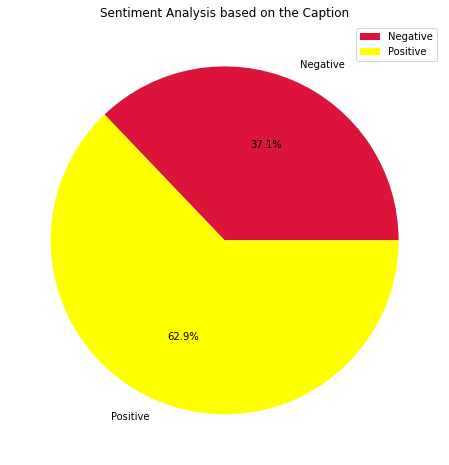

In [30]:
reviewdata=pd.DataFrame()
reviewdata['review']=review
reviewdata=reviewdata.groupby(['review'])['review'].count().to_frame()
x=reviewdata.index
y=reviewdata['review']
plt.figure(figsize=(8,8))
plt.pie(y,labels=x,colors=['crimson','yellow','green'],autopct='%1.1f%%')
plt.title("Sentiment Analysis based on the Caption")
plt.legend()
plt.show()

In [31]:
sentimentsummary=sentimentdata.groupby(['username']).mean()
sentimentsummary=sentimentsummary[['positive','negative']].T
sentimentsummary

username,bbcnews,cnn,dailymail,euronews.tv,hindustantimes,indiatoday,ndtv,skynews,timesnow,wionews
positive,8.20000,5.809804,10.864,7.437255,6.554902,9.905882,10.239216,5.0,6.874510,6.827451
negative,6.02549,6.464706,5.448,8.482353,4.768627,6.566667,4.235294,8.8,7.478431,6.749020


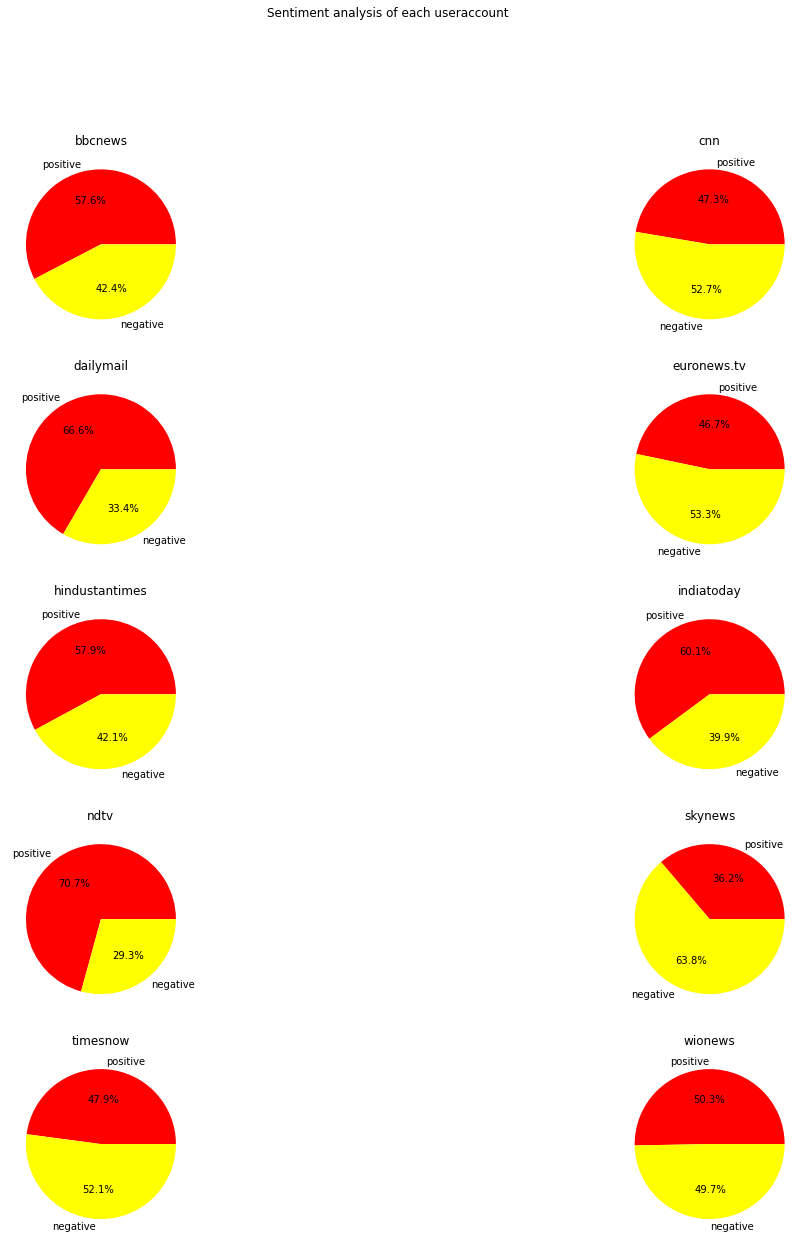

In [32]:
fid,axes=plt.subplots(5,2,figsize=(20,20))
for i in range(len(sentimentsummary.columns)):
    x = sentimentsummary.index
    y = sentimentsummary.iloc[:,i]
    plt.subplot(5, 2, i+1)
    plt.pie(y,labels=x,colors=['red','yellow','green'],autopct='%1.1f%%')
    plt.title(sentimentsummary.columns[i])
plt.suptitle("Sentiment analysis of each useraccount")
plt.show()

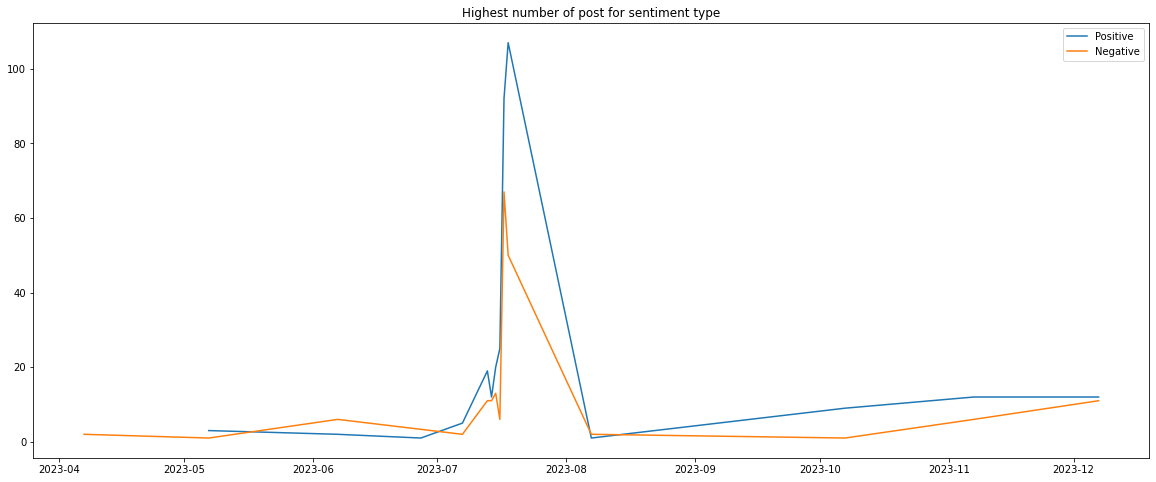

In [33]:
datesentiment=sentimentdata.groupby(['date','overall'])['overall'].count().to_frame()
datesentiment.columns=['count']
datesentiment=datesentiment.reset_index()
pos=datesentiment[datesentiment['overall']=='Positive']
neg=datesentiment[datesentiment['overall']=='Negative']
plt.figure(figsize=(20,8))
plt.plot(pos['date'],pos['count'])
plt.plot(neg['date'],neg['count'])
plt.legend(['Positive','Negative'])
plt.title('Highest number of post for sentiment type')
plt.show()


### YOUTUBE SENTIMENT ANALYSIS

In [34]:
import re
b=df2[['CHANNEL_TITLE','VIDEO_DESCRIPTION','UPLOAD_DATE']].dropna()
l=[]
for i in b.index:
    l.append(re.sub("^\w"," ",re.sub("[0-9]|_|[^a-z]"," ",b["VIDEO_DESCRIPTION"][i])))
b["VIDEO_DESCRIPTION"]=l
b

,CHANNEL_TITLE,VIDEO_DESCRIPTION,UPLOAD_DATE
0,India Today,he upcoming arbie movie and a lackpink co...,2023-07-17 18:30:14+00:00
1,India Today,akistan s intelligence agencies have informed...,2023-07-17 18:00:08+00:00
2,India Today,orld ank resident jay anga on onday said...,2023-07-17 17:56:38+00:00
3,India Today,akistan s intelligence agencies have informed...,2023-07-17 17:49:01+00:00
4,India Today,akistan s intelligence agencies have informed...,2023-07-17 17:39:58+00:00
...,...,...,...
495,Hindustan Times,n alleged revolt has rocked kraine s army am...,2023-04-23 03:09:53+00:00
496,Hindustan Times,iplomatic tensions between ussia and ermany...,2023-04-23 01:30:31+00:00
497,Hindustan Times,ndia and angladesh have joined hands amid a ...,2023-04-22 15:08:13+00:00
498,Hindustan Times,he arrival of much awaited eopard tanks in ...,2023-04-22 13:10:00+00:00


In [49]:

review=[]
positive=[]
negative=[]
overall=[]
for i in b.index:
    sentence=b["VIDEO_DESCRIPTION"][i]
    #print(sentence)
    sentiment_scores(sentence)

In [50]:
sentimentdata=pd.DataFrame()
sentimentdata['username']=b["CHANNEL_TITLE"]
sentimentdata['date']=pd.to_datetime(b['UPLOAD_DATE'])
sentimentdata['year'] = sentimentdata['date'].dt.year
sentimentdata['month'] = sentimentdata['date'].dt.month
sentimentdata['date']=sentimentdata['date'].dt.date
sentimentdata['positive']=positive
sentimentdata['negative']=negative
sentimentdata['overall']=overall
sentimentdata


,username,date,year,month,positive,negative,overall
0,India Today,2023-07-17,2023,7,2.3,0.0,Positive
1,India Today,2023-07-17,2023,7,8.1,1.2,Positive
2,India Today,2023-07-17,2023,7,5.2,1.7,Positive
3,India Today,2023-07-17,2023,7,8.1,1.2,Positive
4,India Today,2023-07-17,2023,7,8.1,1.2,Positive
...,...,...,...,...,...,...,...
495,Hindustan Times,2023-04-23,2023,4,5.5,6.1,Positive
496,Hindustan Times,2023-04-23,2023,4,7.4,5.5,Positive
497,Hindustan Times,2023-04-22,2023,4,9.5,2.3,Positive
498,Hindustan Times,2023-04-22,2023,4,8.4,7.9,Negative


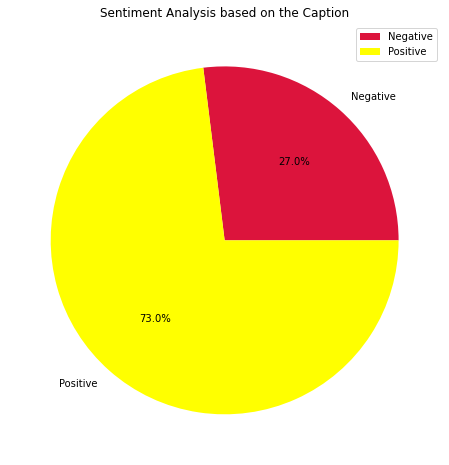

In [51]:
reviewdata=pd.DataFrame()
reviewdata['review']=review
reviewdata=reviewdata.groupby(['review'])['review'].count().to_frame()
x=reviewdata.index
y=reviewdata['review']
plt.figure(figsize=(8,8))
plt.pie(y,labels=x,colors=['crimson','yellow','green'],autopct='%1.1f%%')
plt.title("Sentiment Analysis based on the Caption")
plt.legend()
plt.show()

In [52]:
sentimentsummary=sentimentdata.groupby(['username']).mean()
sentimentsummary=sentimentsummary[['positive','negative']].T
sentimentsummary

username,BBC News,CNN,Daily Mail,Hindustan Times,India Today,NDTV,Sky News,TIMES NOW,WION,euronews
positive,8.256,5.543750,7.622,8.344,5.066,6.518,5.518367,8.302,13.670,6.416
negative,11.200,9.902083,4.964,7.392,1.730,1.904,3.771429,3.476,6.782,0.802


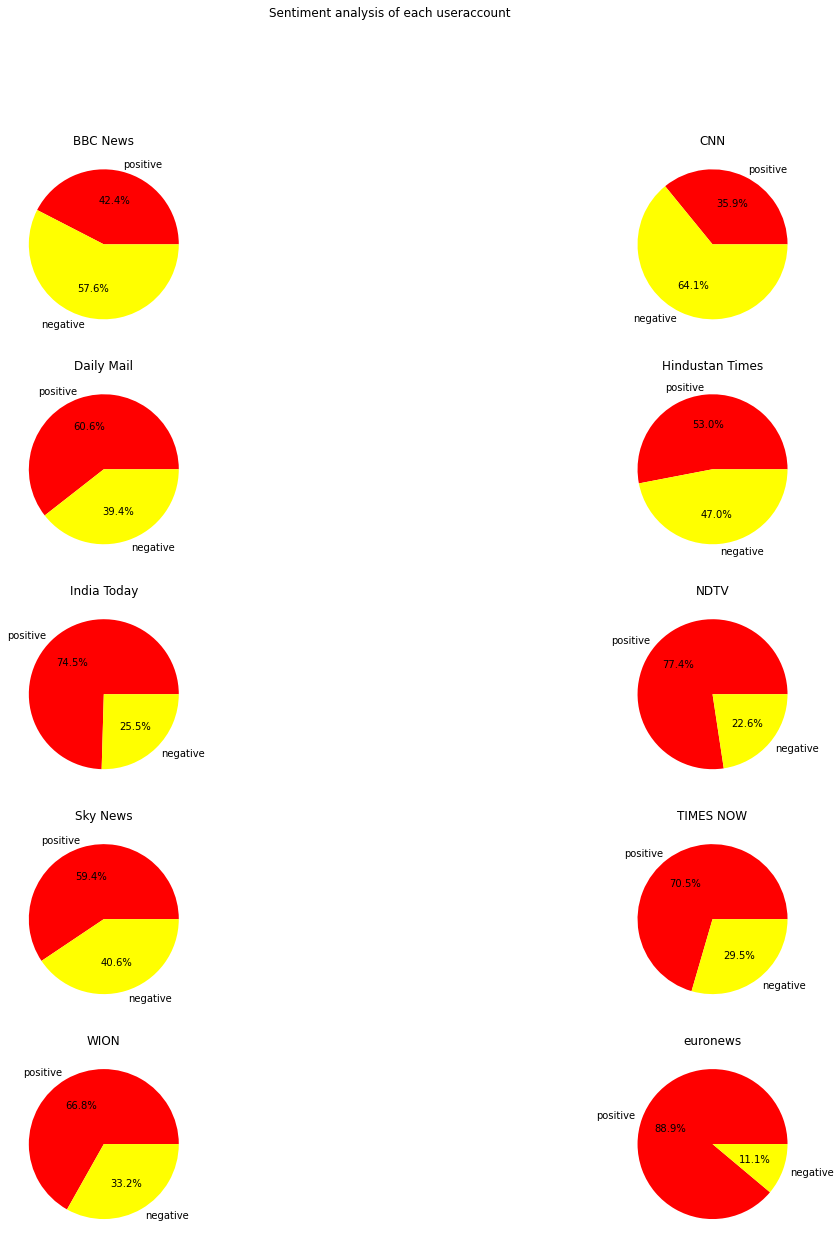

In [53]:
fid,axes=plt.subplots(5,2,figsize=(20,20))
for i in range(len(sentimentsummary.columns)):
    x = sentimentsummary.index
    y = sentimentsummary.iloc[:,i]
    plt.subplot(5, 2, i+1)
    plt.pie(y,labels=x,colors=['red','yellow','green'],autopct='%1.1f%%')
    plt.title(sentimentsummary.columns[i])
plt.suptitle("Sentiment analysis of each useraccount")
plt.show()

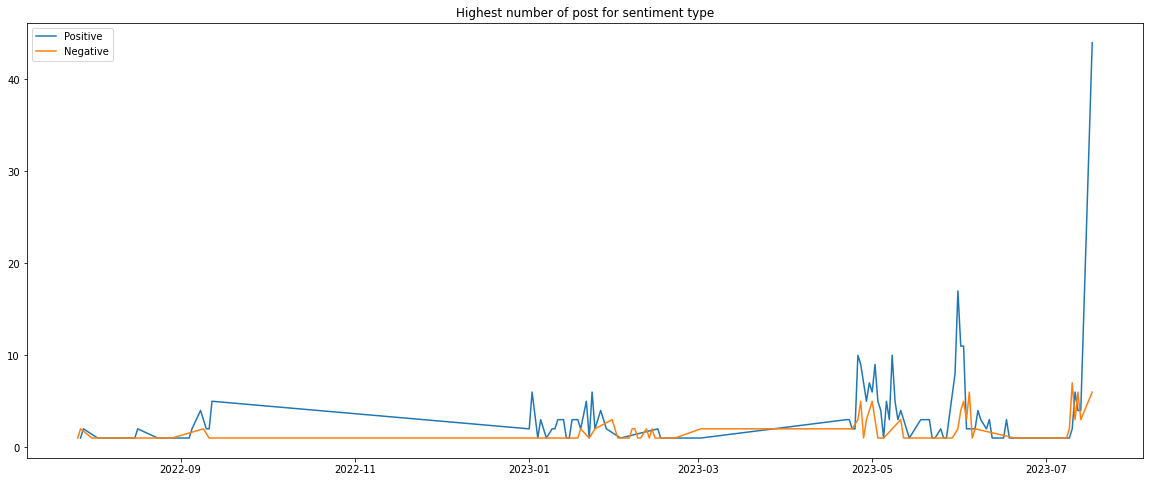

In [48]:
datesentiment=sentimentdata.groupby(['date','overall'])['overall'].count().to_frame()
datesentiment.columns=['count']
datesentiment=datesentiment.reset_index()
datesentiment
pos=datesentiment[datesentiment['overall']=='Positive']
neg=datesentiment[datesentiment['overall']=='Negative']
plt.figure(figsize=(20,8))
plt.plot(pos['date'],pos['count'])
plt.plot(neg['date'],neg['count'])
plt.legend(['Positive','Negative'])
plt.title('Highest number of post for sentiment type')
plt.show()